# Santander Kaggle competition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train-2.csv')
test_data = pd.read_csv('test-2.csv')
sample_submission = pd.read_csv('sample_submission-3.csv')
id_test = test_data['ID']
y_train = train_data['TARGET'].values
X_train = train_data.drop(['ID','TARGET'], axis=1).values
X_test = test_data.drop(['ID'], axis=1).values

## Data Visualization : 

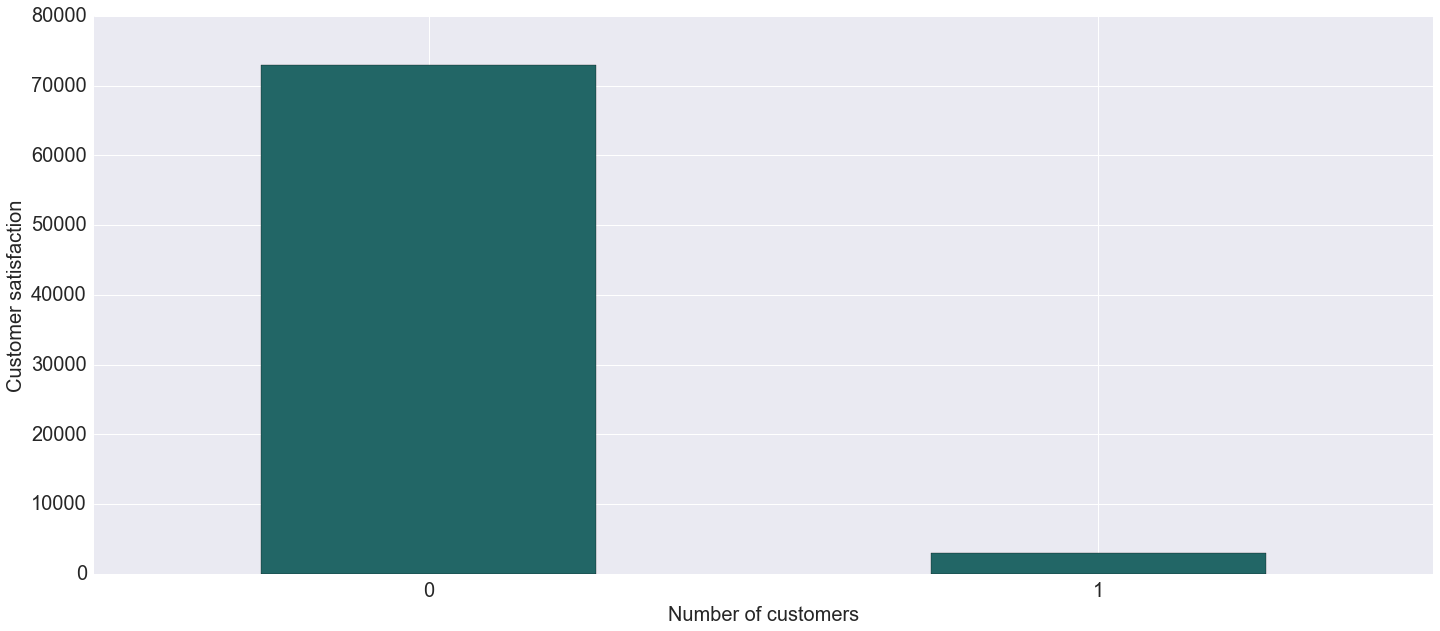

In [13]:
train_data.TARGET.value_counts().plot(kind='bar',color='#226666',rot=0,figsize=(24,10),fontsize=20)
plt.xlabel("Number of customers",fontsize = 20)
plt.ylabel("Customer satisfaction",fontsize = 20)

## PCA decomposition : 

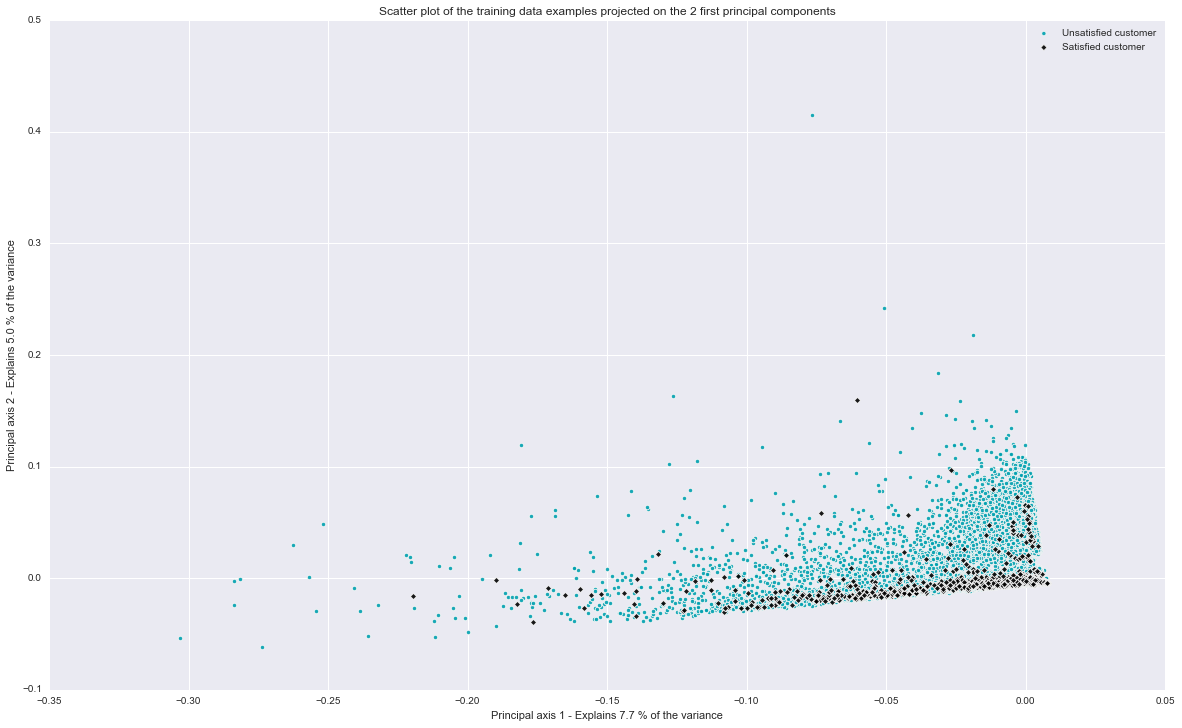

In [16]:
classes = np.sort(np.unique(y_train))
labels = ["Unsatisfied customer", "Satisfied customer"]

# Normalize each feature to unit norm (vector length)
x_train_normalized = normalize(X_train, axis=0)
    
# Run PCA
pca = PCA(n_components=2)
x_train_projected = pca.fit_transform(x_train_normalized)

# Visualize
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 1, 1)
colors = [(0.0, 0.63, 0.69), 'black']
markers = ["o", "D"]
for class_ix, marker, color, label in zip(classes, markers, colors, labels):
    ax.scatter(x_train_projected[np.where(y_train == class_ix), 0],
                x_train_projected[np.where(y_train == class_ix), 1],
                marker=marker, color=color, edgecolor='whitesmoke',
                linewidth='1', alpha=0.9, label=label)
    ax.legend(loc='best')
plt.title("Scatter plot of the training data examples projected on the 2 first principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (pca.explained_variance_ratio_[1] * 100.0))
plt.show()

In [15]:
clf = RandomForestClassifier(n_estimators=100, max_depth=17, random_state=1)
scores = cross_validation.cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=5) 
print(scores.mean())
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
#submission = pd.DataFrame({"ID":id_test, "TARGET":y_pred[:,1]})
#submission.to_csv("submission.csv", index=False)

0.821360825487
